In [9]:
# 923510

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Linear Regression

In this lab, we are going to implement a Linear Regression model "by hand" and also use sklearn to implement linear regressors using different basis functions, and then add regularization to the models.



## Part 1 - Synthetic and real datasets

* Generate 50 points in a line in the interval $[0, 10]$ for `x`, perturbed by a small gaussian noise. For example, `y = 2 * x + 5 + noise` where `noise` is taken from a normal distribution.
* plot the generated data as a scatter plot, and the line without noise as a reference

*Note:* If you want to generate the same data as I generated, use $y = 3x + 5 + \epsilon$ after setting the random seed to 0

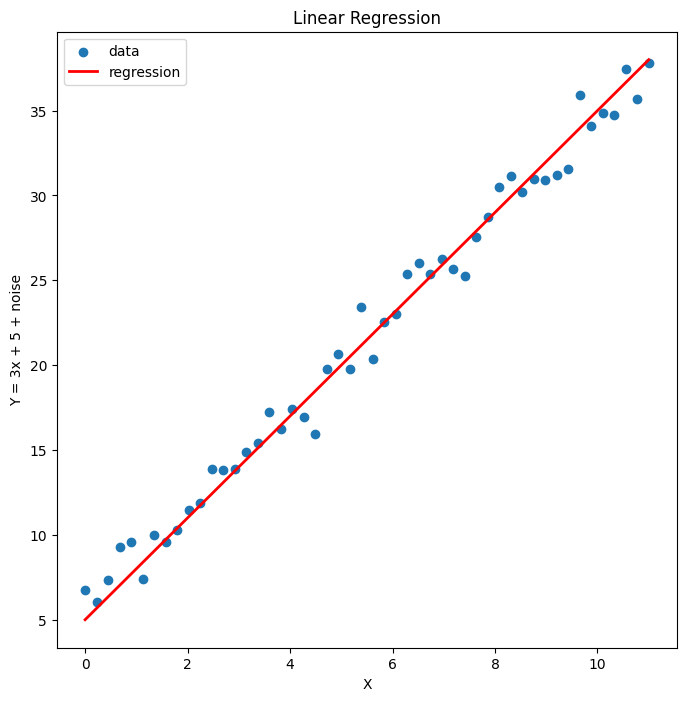

In [11]:
# Creating a random seed
np.random.seed(0)

# Creating a random data with a noise
x = np.linspace(0, 11, 50)
noise = np.random.normal(0, 1, 50)

# Creating a linear regression
y_noise = 3 * x + 5 + noise
y_normal = 3 * x + 5

# Plotting the data
fig = plt.figure(figsize=(8, 8))
plt.scatter(x, y_noise, label='data')
plt.plot(x, y_normal, label='regression', color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y = 3x + 5 + noise')
plt.legend()
plt.show()

### Load the housing dataset

For this lab we will be using the raw version of the Housing dataset that you used for the first coursework.

**Housing.txt:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

In [12]:
housing_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing = pd.read_table("data/housing.txt", names=housing_names, sep='\s+')
housing

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_36353/1980658506.py:2: SyntaxWarning: invalid escape sequence '\s'
  housing = pd.read_table("data/housing.txt", names=housing_names, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Part 2 -- Build Linear Regression Models

You will need to implement it twice:

1. using the Normal Equations seen in class (Moore-Penrose pseudo-inverse)
2. using stochastic gradient descent

* **Tip 1:** When you implement the stochastic gradient version it will be crucial to plot the sum of squares error as a function of the iteration
* **Tip 2:** You will need to initialize the weights. Start by choosing them randomly, Gaussian distributed, with a very small variance...

Run some experiments with your stochastic gradient descent version, and think about these questions: 
* what happens with different values of the step parameter? 
* Does the system always converge to the same solution? 
* Are you getting the same solution that you get with the closed form implementation? 
* What happens if you initialize your weights to values that are too big?

Below, I provide some skeletons for your implementations, but feel free to structure your code differently.

Remember to:
* Separate the datasets into training and testing (I used 60% for training)
* Split the data using sklearn's train_test_split


In [13]:
def linear_regression_PI(X, y):
    """
    Implements a Linear Regression model using the Moore-Penrose pseudo-inverse
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    
    Returns
    -------
    w : array
        Learnt parameters
            
    Notes
    -----
    The first column of X corresponds to the bias (`w_0`)
    """
    
    # Converting to numpy arrays
    X = X.to_numpy()
    y = y.to_numpy()
    
    # Adding a column of ones to X
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Calculating the pseudo-inverse (np.linalg.pinv(X) is a safer to use than X_piv = np.linalg.inv(X.T @ X) @ X.T)
    X_pinv = np.linalg.pinv(X)

    # Creating the learned parameters
    w = X_pinv @ y
    
    return w

def linear_regression_SGD(X, y, lr=1e-8, epochs=10):
    """
    Implements a Linear Regression model using Stochastic Gradient Descent
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    lr : float
        Learning rate
    epochs : int
        number of epochs to use for the gradient descent
    
    Returns
    -------
    w : array
        Learnt parameters
    sse_history : list
        A list that contains the error of the model in every iteration
        
    Notes
    -----
    This function uses the gradient of the sum of squares function (Equations 3.12, and 3.23 in the Bishop book)
    """
    
    # Convert to numpy arrays
    X = X.to_numpy()
    y = y.to_numpy()
    
    # Adding a column of ones to X (bias terms)
    X = np.hstack([np.ones((X.shape[0], 1)), X])

    # Initialize weights with random values from a normal distribution (small variation)
    w_0 = np.random.normal(0, 0.01, X.shape[1])
    w = w_0.copy()

    # Store SSE and weight history
    w_history = []
    sse_history = []

    # Perform Stochastic Gradient Descent (SGD)
    for epoch in range(epochs):
        
        # Shuffle the data in each epoch
        indices = np.random.permutation(X.shape[0])
        
        for i in indices:
            
            # Get current data point
            phi_xi = X[i, :]

            # Compute error for the current data point
            error = y[i] - np.dot(w, phi_xi)

            # Update weights
            w = w + (lr * error) * phi_xi

            # Store a copy of the weights
            w_history.append(w.copy())

            # Compute and store SSE
            sse = float(0.5 * (error ** 2))
            sse_history.append(sse)

    # Find the best weights based on lowest SSE
    w = w_history[np.argmin(sse_history)]

    return w, sse_history

we can now use this function to learn the parameters for predicting `NOX`

First you will have to prepare the data:
- Separate the features from the target variables (Put the features in a matrix X and the target variable in a vector y)
- Split the data using sklearn's train_test_split.

In [14]:
# Conventions

# Splitting the data
X = housing.drop("NOX", axis=1)
y = housing["NOX"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, shuffle=True)

# Doing the bias column, defining the epochs and the learning rate
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
epochs = 100
lr = 1e-22  # We choose a very small learning rate (1e-20) to avoid overshooting

Now use the functions you coded to learn the weights!

In [15]:
# Moore-Penrose pseudo-inverse linear regression

# Learning the weights and evaluating the sse with the test set
w = linear_regression_PI(X_train, y_train)
sse_PI = np.sqrt(np.mean((y_test - X_test @ w)**2))

print("Weights learned with the Moore-Penrose pseudo-inverse:")
print(w)
print(f"RMSE: {sse_PI}")

Weights learned with the Moore-Penrose pseudo-inverse:
[ 8.22109709e-01 -5.53736990e-04  4.40283532e-05  4.54892895e-03
  3.77193402e-03 -2.02065488e-03  9.98176119e-04 -1.64011797e-02
  3.72580408e-03  1.32993091e-05 -1.43630004e-02 -1.92213365e-05
 -1.13401448e-03 -2.81339182e-03]
RMSE: 0.05442469150661578


In [16]:
# Stochastic Gradient Descent linear regression

# Learning the weights and evaluating the sse with the test set
w, sse_history_nox = linear_regression_SGD(X_train, y_train, epochs=epochs)
sse_SGD = np.sqrt(np.mean((y_test - X_test @ w)**2))

print("Weights learned with Stochastic Gradient Descent:")
print(w)
print("SSE history:")
print(sse_history_nox)
print(f"RMSE_SGD: {sse_SGD}")

Weights learned with Stochastic Gradient Descent:
[-0.00893722  0.00384401 -0.00457217 -0.01165984 -0.00028013  0.00440052
  0.00165829  0.00310018 -0.00626761  0.00125657 -0.00643608  0.00196365
 -0.00797279 -0.01671372]
SSE history:
[5.439757136087032, 8.992838882584808, 7.860908803600795, 6.864413679801242, 13.796995248626345, 11.002059710693988, 7.112285344225038, 7.630348621092198, 7.261380915359287, 9.635766502092338, 13.24785249371433, 6.427748718586616, 6.787872560891956, 6.340767060396841, 5.564758697481609, 7.124035232039009, 5.84652662600065, 11.44182560101356, 7.342895452242785, 11.755032335703552, 6.9371885227903745, 11.855752354910186, 12.11062388697845, 4.676605525455627, 12.39537290366642, 6.075105942576741, 8.343711943456848, 7.977062998900284, 11.45525895063241, 5.497907827004673, 5.652856613908477, 10.227482172871248, 5.788486189915988, 10.909405715106292, 7.048306209155249, 6.452380490184933, 4.8598055025249005, 8.926689404429053, 7.297501480120873, 9.00606343939422

make a plot that shows the evolution of the sum of squares error

**tip:** make it a callable function that you can reuse for the next task

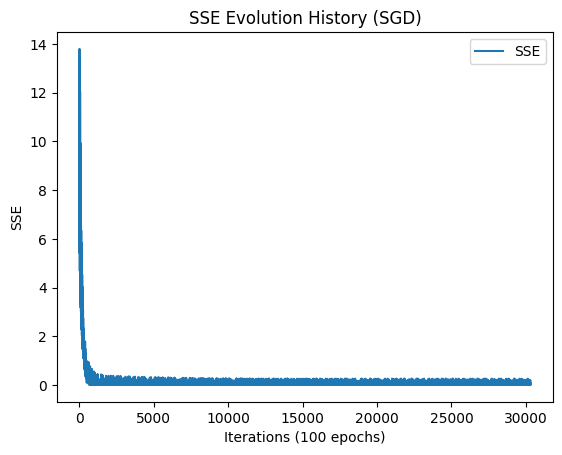

In [17]:
# Creating a function to plot the SSE history and reuse it later
def plot_sse(sse_history, title="SSE Evolution History (SGD)", epochs=100):
    """
    Plots the Sum Squared Error (SSE) history
    
    Parameters
    ----------
    sse_history : array
        An array that contains the error of the model in every iteration
    title : str
        The title of the plot
    """
    
    plt.plot(sse_history)
    plt.xlabel(f"Iterations ({epochs} epochs)")
    plt.ylabel("SSE")
    plt.title(title)
    plt.legend(["SSE"])
    plt.show()

# Plotting the SSE history
plot_sse(sse_history_nox, epochs=epochs)

Use the learn weights to make predictions for the test set, and evaluate the model using the root mean squared error (remember that the bias is the first column of the weight matrix)
- You can use the function you coded for your coursework, but feel free to use sklearn's `mean_squared_error()` here

Repeat the same analysis for predicting `MEDV`

In [40]:
# Conventions
np.random.seed(0)

# Splitting the data
X = housing.drop("MEDV", axis=1)
y = housing["MEDV"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, shuffle=True)

# Doing the bias column, defining the epochs and the learning rate
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
epochs = 100
lr = 1e-8 # We choose a very small learning rate (1e-8) to avoid overshooting

(203, 14)
Weights learned with the Moore-Penrose pseudo-inverse:
[ 4.54814196e+01 -1.03747356e-01  5.58589924e-02  5.88240770e-02
  2.50523544e+00 -1.90284888e+01  3.25353601e+00 -3.22150522e-03
 -1.57603462e+00  2.58716068e-01 -1.14681299e-02 -1.10777478e+00
  5.50051783e-03 -5.59569992e-01]
RMSE: 5.078421226198408

Weights learned with Stochastic Gradient Descent:
[-0.01335318 -0.00219852  0.01327719 -0.00399394  0.00357297 -0.00675646
  0.00330932 -0.00191188 -0.00986205 -0.01776823 -0.00272799 -0.00145669
  0.06419102 -0.00209621]
SSE history:
[103.75445636591293, 119.1062509235564, 35.154784143350554, 234.40278519505034, 122.28862272555098, 54.266134006478595, 35.38226484341438, 763.3412684897781, 103.53237896849903, 823.7477594076491, 118.20570273392931, 94.15523442877542, 23.231143028013637, 255.1776707063325, 46.762329926409, 41.44143141001062, 357.00909066229474, 53.36725063489689, 162.87862909369258, 96.70423842222878, 95.9812897780711, 77.12078172874354, 36.281255747221564, 

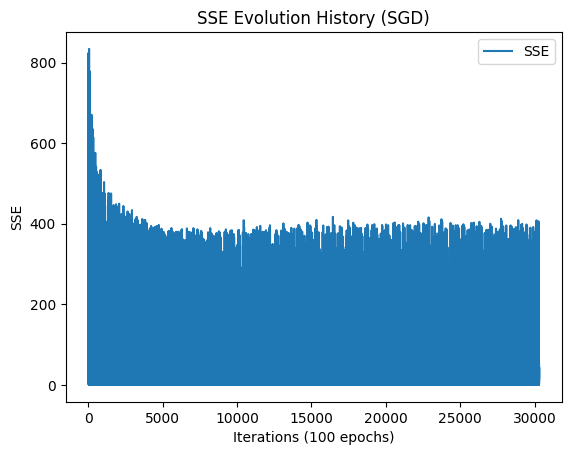

In [ ]:
# Moore-Penrose pseudo-inverse linear regression and error
w = linear_regression_PI(X_train, y_train)
sse_PI = np.sqrt(np.mean((y_test - X_test @ w)**2))

print("Weights learned with the Moore-Penrose pseudo-inverse:")
print(w)
print(f"RMSE: {sse_PI}")
print()

# Stochastic Gradient Descent linear regression and error
w, sse_history_medv = linear_regression_SGD(X_train, y_train, lr=lr, epochs=epochs)
sse_SGD = np.sqrt(np.mean((y_test - X_test @ w)**2))

print("Weights learned with Stochastic Gradient Descent:")
print(w)
print("SSE history:")
print(sse_history_medv)
print(f"RMSE_SGD: {sse_SGD}")

plot_sse(sse_history_medv, epochs=epochs)

## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



In [20]:
# Creating a 2D random data with a noise
np.random.seed(0)
X = np.random.uniform(0, 11, 50).reshape(-1, 1)
noise = np.random.normal(0, 1, X.shape)
y = 4 * np.sin(X) + noise

In [21]:
# Function to perform polynomial regression using a polynomial basis of a given degree
def polynomial_regression(X, y, degree):
    
    # Reshape X and y into column vectors to ensure correct matrix operations
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    # Define the number of rows (samples) and columns (polynomial terms)
    rows = X.shape[0]
    cols = degree + 1  # +1 to include the bias term (w_0)

    # Initialize the design matrix (phi_matrix) with zeros
    phi_matrix = np.zeros((rows, cols))
    
    # Fill the design matrix with polynomial terms (X^0, X^1, ..., X^degree)
    for i in range(cols):
        phi_matrix[:, i] = X.flatten() ** i  # Flatten ensures compatibility with numpy operations

    # Compute the pseudoinverse of the design matrix
    phi_matrix_pinv = np.linalg.pinv(phi_matrix)
    
    # Calculate the weight vector w using the least squares solution
    w = phi_matrix_pinv @ y
    
    # Reshape w into a column vector
    w = w.reshape(-1, 1)

    return w

# Function to plot the polynomial regression model
def plot_polynomial_regression(X, y, degree):
    
    # Compute the polynomial regression coefficients
    w = polynomial_regression(X, y, degree)
    
    # Generate test points for a smooth curve
    X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    
    # Create a design matrix for the test points
    phi_test = np.zeros((X_test.shape[0], degree + 1))

    # Fill the test design matrix with polynomial terms
    for i in range(degree + 1):
        phi_test[:, i] = X_test.flatten() ** i

    # Compute predicted values using the learned coefficients
    y_pred = phi_test @ w  

    fig = plt.figure(figsize=(8, 8))

    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Original Data')

    # Plot the polynomial regression curve
    plt.plot(X_test, y_pred, color='red', label=f'Polynomial Regression (degree {degree})')

    # Plot properties
    plt.xlabel("X")
    plt.ylabel("y = 4sin(X) + noise")
    plt.legend()
    plt.title(f"Polynomial Regression (degree {degree})")
    plt.show()

In [22]:
# Learned coefficients
w_2 = polynomial_regression(X, y, 2)
w_4 = polynomial_regression(X, y, 4)
w_9 = polynomial_regression(X, y, 9)

print("Coefficients of polynomial regression with degree 2")
print(w_2)
print()
print("Coefficients of polynomial regression with degree 4")
print(w_4)
print()
print("Coefficients of polynomial regression with degree 9")
print(w_9)

Coefficients of polynomial regression with degree 2
[[ 1.52366529]
 [-0.35158524]
 [ 0.01469225]]

Coefficients of polynomial regression with degree 4
[[ 1.1491412 ]
 [ 3.99891215]
 [-2.78656655]
 [ 0.49978279]
 [-0.02627418]]

Coefficients of polynomial regression with degree 9
[[-4.61305716e+00]
 [ 2.94993044e+01]
 [-3.99776617e+01]
 [ 2.70681976e+01]
 [-1.02659010e+01]
 [ 2.24883555e+00]
 [-2.87882443e-01]
 [ 2.10917946e-02]
 [-8.11725366e-04]
 [ 1.25491526e-05]]


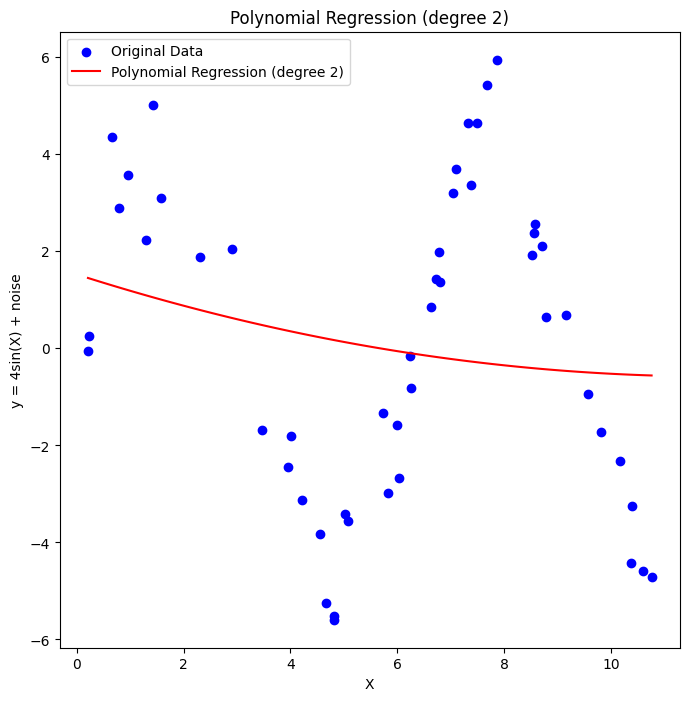

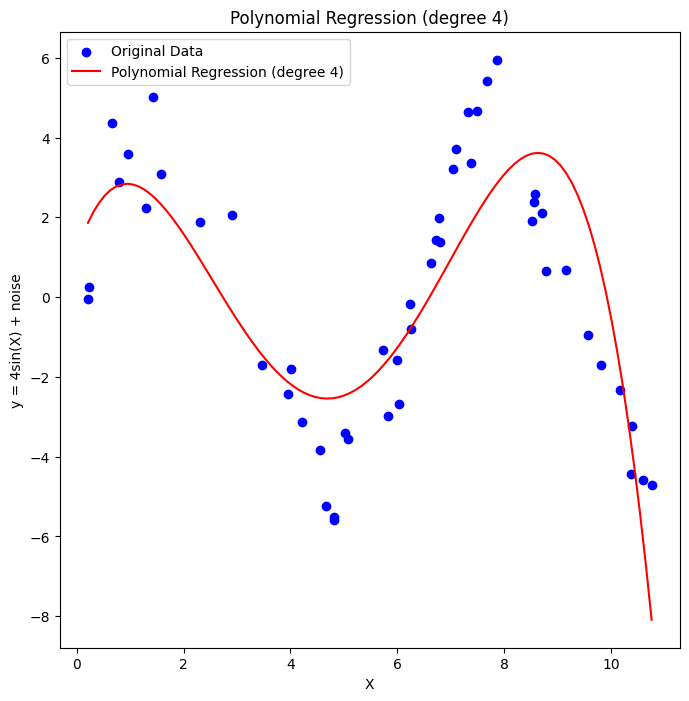

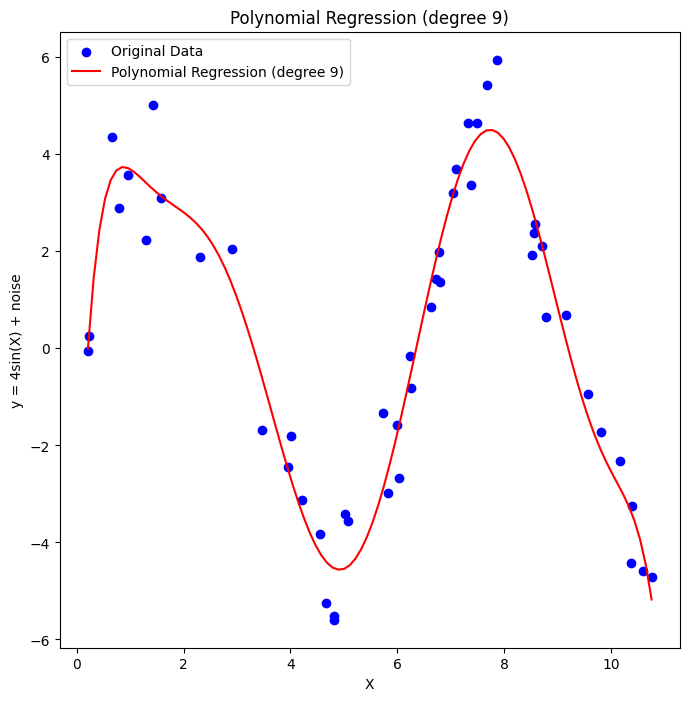

In [23]:
# Plotting the regressions
plot_polynomial_regression(X, y, 2)
plot_polynomial_regression(X, y, 4)
plot_polynomial_regression(X, y, 9)

## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

In [24]:
# Importing the necessary libraries from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

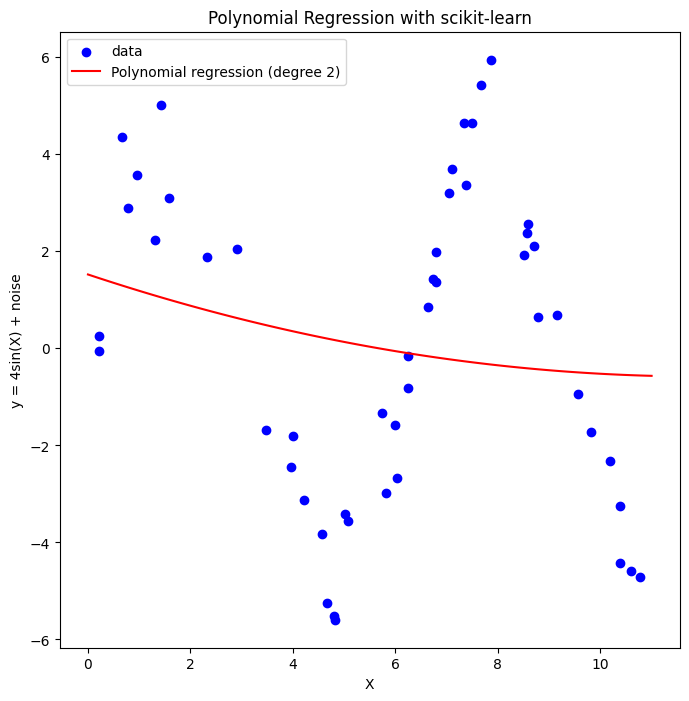

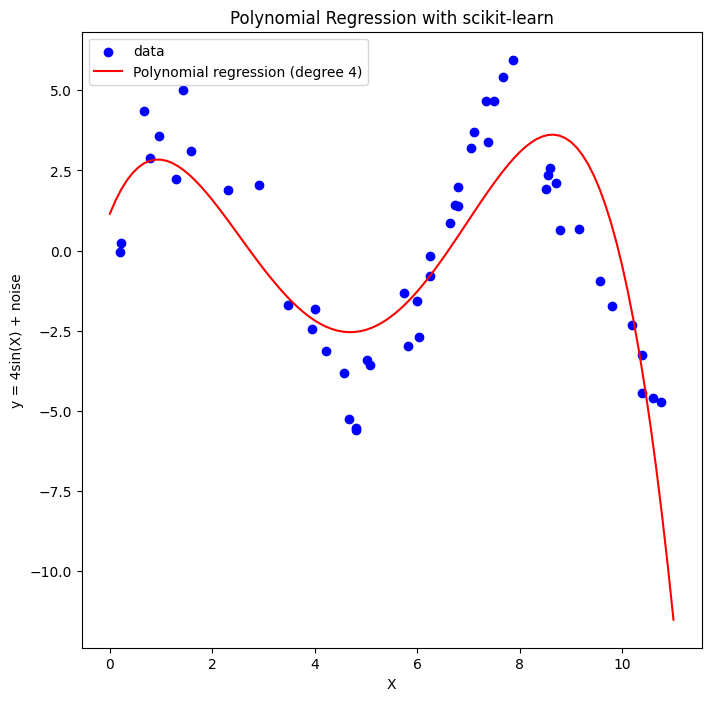

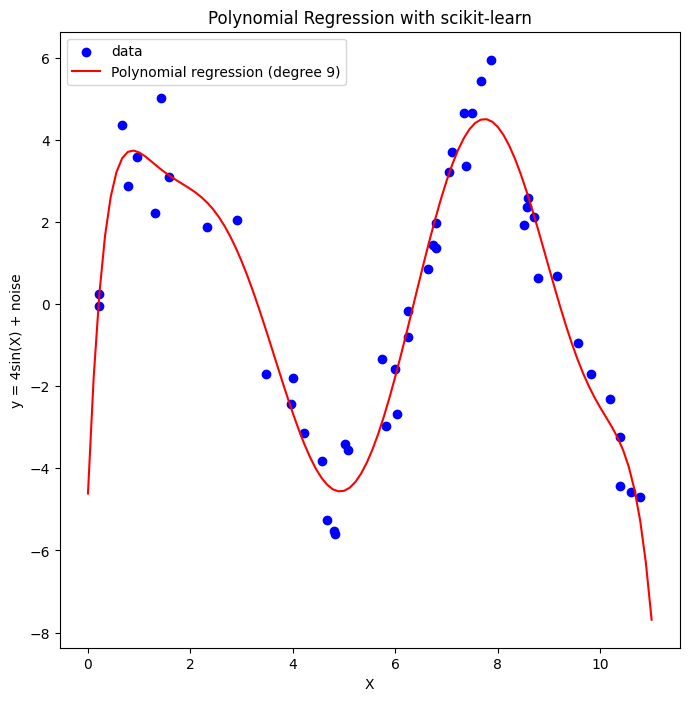

In [25]:
# Creating a random seed
# We're using the same data as before

# Creating a list of polynomial degrees
degrees = [2, 4, 9]

# Creating a 2D linear regression with a polynomial of degrees 2, 4, and 9
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Training the model
    model.fit(X, y)

    # Making predictions
    X_pred = np.linspace(0, 11, 100).reshape(-1, 1)  # Smoothing the graph
    y_pred = model.predict(X_pred)

    # Plotting the regressions
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(X, y, color="blue", label="data")
    plt.plot(X_pred, y_pred, color="red", label=f"Polynomial regression (degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y = 4sin(X) + noise")
    plt.legend()
    plt.title("Polynomial Regression with scikit-learn") 
    plt.show()